In [1]:
# load data
# !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
# !unzip data.zip

In [2]:
# To turn them lightly different numerical results due to floating-point round-off errors, set the environment variable
import os

# Set TF_ENABLE_ONEDNN_OPTS to 0
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

# Now import TensorFlow
# import tensorflow as tf

!TF_ENABLE_ONEDNN_OPTS=0

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

%matplotlib inline

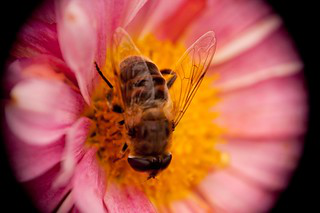

In [4]:
path = './data/test/bee'
name = '10007154554_026417cfd0_n.jpg'
fullname = f'{path}/{name}'
image = load_img(fullname)
image

In [5]:
# Get the dimensions (width, height) of the image
width, height = image.size

# Print the dimensions
print(f"Width: {width}, Height: {height}")

Width: 320, Height: 213


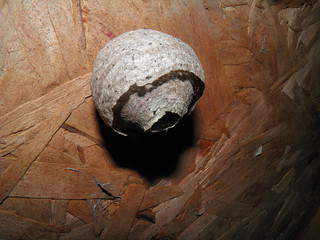

In [6]:
path = './data/test/wasp'
name = '10005022206_14b5459e50_n.jpg'
fullname = f'{path}/{name}'
image = load_img(fullname)
image

In [7]:
# Get the dimensions (width, height) of the image
width, height = image.size

# Print the dimensions
print(f"Width: {width}, Height: {height}")

Width: 320, Height: 240


In [8]:
# create convolutional layer 
input_shape = (150, 150, 3)

cnn_input = keras.Input(shape=input_shape, name="img")

# convolution layer
x = keras.layers.Conv2D(32, 3, activation="relu")(cnn_input)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Flatten()(x)

# dense layer
x = keras.layers.Dense(64, activation='relu')(x)
cnn_output = keras.layers.Dense(1, activation="sigmoid")(x)

cnn_model = keras.Model(cnn_input, cnn_output, name="cnn")
cnn_model.summary()

2023-11-15 22:51:00.712815: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-15 22:51:00.734689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-15 22:51:00.735466: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                               

2023-11-15 22:51:00.736733: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 22:51:00.737161: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-15 22:51:00.737739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-15 22:51:00.738311: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so ret

In [9]:
# load training images
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './data/train',
    batch_size=20,
    target_size=(150, 150),
    class_mode='binary',
    shuffle=True
)

Found 3677 images belonging to 2 classes.


In [10]:
test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    './data/test',
    batch_size=20,
    target_size=(150, 150),
    class_mode='binary',
    shuffle=True
)

Found 927 images belonging to 2 classes.


In [11]:
# train the model
learning_rate = 0.002
momentum = 0.8

optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
loss = keras.losses.BinaryCrossentropy()

cnn_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# cnn_model.fit(train_ds, epochs=10, validation_data=test_ds)

In [12]:
history = cnn_model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10


2023-11-15 22:51:02.983136: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-15 22:51:03.626450: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-15 22:51:03.627432: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-15 22:51:03.627470: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-15 22:51:03.628298: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-15 22:51:03.628381: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


184/184 [==============================] - 11s 46ms/step - loss: 0.6673 - accuracy: 0.5850 - val_loss: 0.6220 - val_accuracy: 0.6268
Epoch 2/10
184/184 [==============================] - 8s 44ms/step - loss: 0.6408 - accuracy: 0.6231 - val_loss: 0.6007 - val_accuracy: 0.6796
Epoch 3/10
184/184 [==============================] - 8s 45ms/step - loss: 0.5949 - accuracy: 0.6815 - val_loss: 0.5542 - val_accuracy: 0.7174
Epoch 4/10
184/184 [==============================] - 8s 45ms/step - loss: 0.5386 - accuracy: 0.7340 - val_loss: 0.5434 - val_accuracy: 0.7217
Epoch 5/10
184/184 [==============================] - 8s 45ms/step - loss: 0.5012 - accuracy: 0.7623 - val_loss: 0.5130 - val_accuracy: 0.7497
Epoch 6/10
184/184 [==============================] - 8s 45ms/step - loss: 0.4757 - accuracy: 0.7773 - val_loss: 0.5132 - val_accuracy: 0.7519
Epoch 7/10
184/184 [==============================] - 8s 45ms/step - loss: 0.4472 - accuracy: 0.7996 - val_loss: 0.5161 - val_accuracy: 0.7508
Epoch 8/1

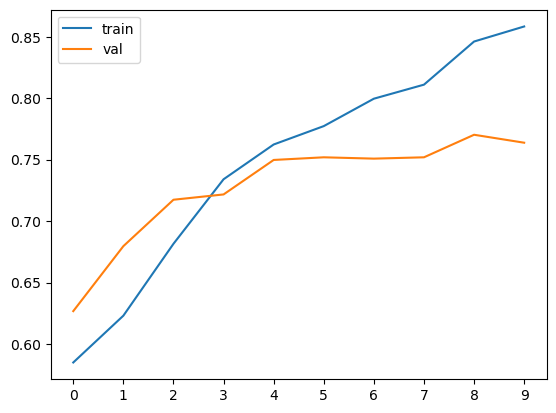

In [13]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [14]:
median_accuracy = np.median(history.history['accuracy'])
print(f'Median of training accuracy: {median_accuracy:.2f}')

Median of training accuracy: 0.77


In [15]:
standard_deviation = np.std(history.history['loss'])
print(f'Standard deviation of training loss: {standard_deviation:.2f}')

Standard deviation of training loss: 0.10


In [16]:
# augment training data
train_gen = ImageDataGenerator(    
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds1 = train_gen.flow_from_directory(
    './data/train',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 3677 images belonging to 2 classes.


In [17]:
history1 = cnn_model.fit(train_ds1, epochs=20, validation_data=test_ds)

Epoch 1/20
184/184 [==============================] - 23s 127ms/step - loss: 0.5001 - accuracy: 0.7686 - val_loss: 0.4853 - val_accuracy: 0.7832
Epoch 2/20
184/184 [==============================] - 23s 126ms/step - loss: 0.4939 - accuracy: 0.7718 - val_loss: 0.5108 - val_accuracy: 0.7551
Epoch 3/20
184/184 [==============================] - 23s 127ms/step - loss: 0.4880 - accuracy: 0.7721 - val_loss: 0.4882 - val_accuracy: 0.7691
Epoch 4/20
184/184 [==============================] - 23s 126ms/step - loss: 0.4795 - accuracy: 0.7781 - val_loss: 0.4648 - val_accuracy: 0.7810
Epoch 5/20
184/184 [==============================] - 23s 127ms/step - loss: 0.4789 - accuracy: 0.7827 - val_loss: 0.4533 - val_accuracy: 0.7940
Epoch 6/20
184/184 [==============================] - 23s 126ms/step - loss: 0.4641 - accuracy: 0.7865 - val_loss: 0.4775 - val_accuracy: 0.7691
Epoch 7/20
184/184 [==============================] - 23s 125ms/step - loss: 0.4637 - accuracy: 0.7794 - val_loss: 0.4529 - val_ac

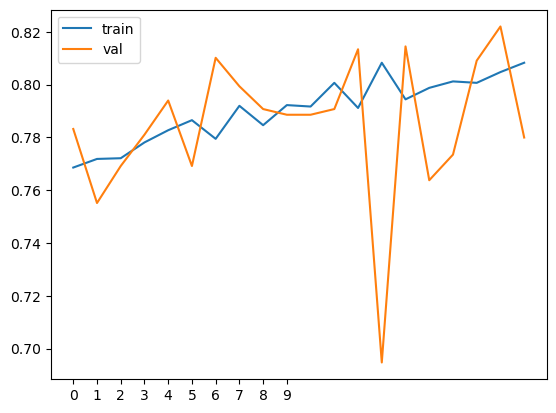

In [18]:
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [19]:
overall_mean = np.mean(history.history['val_loss'] + history1.history['val_loss'])
print(f'Mean of validation losses : {overall_mean:.2f}')

Mean of validation losses : 0.50


In [20]:
last_5_average = np.average(history1.history['accuracy'][5:])
print(f'average of test accuracy for the last 5 epochs : {last_5_average:.2f}')

average of test accuracy for the last 5 epochs : 0.80
